### Prevalence by location Workflow

In [1]:
import os
import altair as alt
import pandas as pd
import outbreak_data as od




# past_num_days = 180
# today = pd.Timestamp(2022, 1, 1, 12)
# delta = pd.Timedelta(days=past_num_days)
# data = data.where(data['date'].apply(lambda x: x > (today - delta))).dropna(how='all')
        




In [415]:
# Returned Dataframe
data=od.prevalence_by_location("IND", ndays=90, other_threshold=0.03, startswith = 'xbb')
data['prevalence_rolling'] = data['prevalence_rolling'].apply(lambda x: x*100)

data['date'] = pd.to_datetime(data['date']) # If your Date column is of the type object otherwise skip this
data = data.sort_values(by="date")
data = data.loc[data["date"].between("2022-09-12", "2023-03-31")]

print(data)

           date  total_count  lineage_count     lineage  prevalence  \
3014 2022-09-12            0              0    xbb.1.16    0.000000   
3781 2022-09-12            0              0     xbb.2.3    0.000000   
2593 2022-09-12          152              2       xbb.1    0.013158   
3782 2022-09-13            0              0     xbb.2.3    0.000000   
3015 2022-09-13            0              0    xbb.1.16    0.000000   
...         ...          ...            ...         ...         ...   
4086 2023-03-31          196              2   xbb.2.3.2    0.010204   
3322 2023-03-31          196             29  xbb.1.16.1    0.147959   
2793 2023-03-31          196              1       xbb.1    0.005102   
3381 2023-03-31          196              7  xbb.1.16.2    0.035714   
3981 2023-03-31          196             15     xbb.2.3    0.076531   

      prevalence_rolling  
3014            0.000000  
3781            0.000000  
2593            0.345125  
3782            0.000000  
3015        

In [297]:
# Graph of results
alt.Chart(data, title = "Lineage Prevalence in India").mark_area().encode(
    x='date:T',
    y=alt.Y('prevalence_rolling:Q'),
    color = 'lineage:N')

alt.Chart(...)

Find the top 5 most prevalent lineages

In [435]:
data=od.prevalence_by_location("IND")
most_prev = data.groupby('lineage').apply(max)
most_prev = most_prev.mask(most_prev == '').dropna(how = 'any')
most_prev = most_prev.iloc[:4]

print(most_prev)

                 date  total_count  lineage_count    lineage  prevalence  \
lineage                                                                    
ba.2       2023-04-20         5668           1445       ba.2    0.822785   
ba.2.10.1  2023-04-19         5668             93  ba.2.10.1    0.285714   
bq.1.1     2023-03-27          402              7     bq.1.1    0.428571   
ch.1.1     2023-02-13          119              4     ch.1.1    0.400000   
other      2023-04-17         5668           4153      other    1.000000   

           prevalence_rolling  
lineage                        
ba.2                 0.677541  
ba.2.10.1            0.095541  
bq.1.1               0.156863  
ch.1.1               0.066667  
other                1.000000  


In [436]:
# Get numbers on the prevalence of these lineages
d1 = od.daily_prev('ba.2', "IND")
d2 = od.daily_prev('ba.2.10.1', "IND")
d3 = od.daily_prev('bq.1.1', "IND")
d4 = od.daily_prev( 'ch.1.1', "IND")

In [439]:
d5 = od.daily_prev( 'other', "IND")
d5

""


In [437]:
# Formatting for creating the graph
d1['lineage'] = 'ba.2'
d2['lineage'] = 'ba.2.10.1'
d3['lineage'] = 'bq.1.1'
d4['lineage'] = 'ch.1.1'

In [437]:
d5['lineage'] = 'other'

In [437]:
data = pd.concat([d1, d2, d3, d4, d5])
data = data.sort_values(by="date")
data = data.rename(columns = {'proportion': 'proportion (%)'})
data = data.loc[data["date"].between("2022-09-12", "2023-03-31")]
data['proportion'] = data['proportion'].apply(lambda x: x*100)

print(data)

           date  total_count  lineage_count  total_count_rolling  \
271  2022-09-12        152.0            3.0           165.571429   
772  2022-09-12        152.0            2.0           165.571429   
272  2022-09-13        122.0            3.0           152.857143   
773  2022-09-13        122.0            1.0           152.857143   
774  2022-09-14         99.0            1.0           138.142857   
..          ...          ...            ...                  ...   
195  2023-03-30        150.0            0.0           201.000000   
470  2023-03-31        196.0            0.0           201.571429   
187  2023-03-31        196.0            0.0           201.571429   
196  2023-03-31        196.0            0.0           201.571429   
971  2023-03-31        196.0            0.0           201.571429   

     lineage_count_rolling  proportion  proportion_ci_lower  \
271               1.142857    0.690250             0.000651   
772               1.142857    0.690250             0.0006

In [440]:


alt.Chart(data, title = "Top 4 Most Prevalent Lineages in India").mark_area().encode(
    x='date:T',
    y=alt.Y('proportion (%):Q'),
    color = 'lineage:N')

alt.Chart(...)

**Mutations_by_lineage Heatmap**

In [3]:
lineages = od.lineage_mutations("xbb1.9.1")
lineages

/Users/sarahrandall/Python-outbreak-info/src/outbreak_data/outbreak_data.py:70: UserWarning: Warning!: Data has "results" but length of data is 0
  warnings.warn('Warning!: Data has "results" but length of data is 0')


UnboundLocalError: local variable 'df' referenced before assignment

### SubAdmin Chart

In [243]:
xbb23 = od.lineage_by_sub_admin("xbb.1.5")
x=xbb23.loc[xbb23['name'].isin(['Canada', 'United States', 'Mexico', 'China', 'France'])]
print(x) #Modified Table


,date,name,id,total_count,lineage_count,cum_total_count,cum_lineage_count,proportion,proportion_ci_lower,proportion_ci_upper
0,2022-04-05,Afghanistan,AFG,3,0,107,0,0.000000,4.578388e-06,0.023149
1,2022-07-15,Albania,ALB,7,0,1370,0,0.000000,3.583539e-07,0.001832
2,2023-02-19,Algeria,DZA,1,0,727,2,0.002751,5.720993e-04,0.008796
3,2022-12-27,Andorra,AND,2,0,324,0,0.000000,1.514369e-06,0.007717
4,2022-10-24,Angola,AGO,1,0,1184,0,0.000000,4.146375e-07,0.002119
...,...,...,...,...,...,...,...,...,...,...
205,2023-03-27,Venezuela,VEN,1,1,1197,9,0.007519,3.726658e-03,0.013677
206,2023-02-13,Vietnam,VNM,1,0,8690,0,0.000000,5.650408e-08,0.000289
207,2021-04-19,Wallis and Futuna,WLF,1,0,10,0,0.000000,4.789043e-05,0.217196
208,2023-01-30,Zambia,ZMB,8,0,1894,3,0.001584,4.463063e-04,0.004221


In [443]:
#xbb23.loc[xbb23['name'] == 'Angola'] 
# Select rows where column 'names' values is in a list of country name values
x=xbb23.loc[xbb23['name'].isin(['Canada', 'United States', 'Mexico', 'China', 'France'])]
print(x) #Modified Table



           date           name   id  total_count  lineage_count  \
35   2023-04-27         Canada  CAN            1              1   
41   2023-04-26          China  CHN            6              0   
65   2023-04-18         France  FRA            6              3   
124  2023-04-04         Mexico  MEX            1              1   
201  2023-04-25  United States  USA            8              6   

     cum_total_count  cum_lineage_count  proportion  proportion_ci_lower  \
35            527171              11151    0.021153             0.020767   
41             24414                 83    0.003400             0.002727   
65            562405               3201    0.005692             0.005498   
124            86430                708    0.008192             0.007607   
201          4591355              80948    0.017631             0.017510   

     proportion_ci_upper  
35              0.021544  
41              0.004190  
65              0.005891  
124             0.008809  
201  

### Daily_Prev Plot: USA

In [376]:
USA_xbb = od.daily_prev("xbb", "USA")
print(USA_xbb)

           date  total_count  lineage_count  total_count_rolling  \
0    2022-08-27         4034              1          4376.142857   
1    2022-08-28         3491              0          4379.000000   
2    2022-08-29         5912              0          4353.142857   
3    2022-08-30         4592              0          4346.428571   
4    2022-08-31         3884              0          4321.428571   
..          ...          ...            ...                  ...   
237  2023-04-21           90              0           137.000000   
238  2023-04-22           48              0           124.428571   
239  2023-04-23           35              0           110.285714   
240  2023-04-24           69              0            89.571429   
241  2023-04-25            8              0            69.142857   

     lineage_count_rolling  proportion  proportion_ci_lower  \
0                 0.142857    0.000033         1.122044e-07   
1                 0.142857    0.000033         1.121275e-

In [377]:
USA_xbb.sort_values(by="date")
USA_xbb['proportion'] = USA_xbb['proportion'].apply(lambda x: x*100)
print(USA_xbb)

           date  total_count  lineage_count  total_count_rolling  \
0    2022-08-27         4034              1          4376.142857   
1    2022-08-28         3491              0          4379.000000   
2    2022-08-29         5912              0          4353.142857   
3    2022-08-30         4592              0          4346.428571   
4    2022-08-31         3884              0          4321.428571   
..          ...          ...            ...                  ...   
237  2023-04-21           90              0           137.000000   
238  2023-04-22           48              0           124.428571   
239  2023-04-23           35              0           110.285714   
240  2023-04-24           69              0            89.571429   
241  2023-04-25            8              0            69.142857   

     lineage_count_rolling  proportion  proportion_ci_lower  \
0                 0.142857    0.003264         1.122044e-07   
1                 0.142857    0.003262         1.121275e-

<AxesSubplot:title={'center':'U.S. Daily XBB Prevalence over Time'}, xlabel='Date', ylabel='Proportion (%)'>

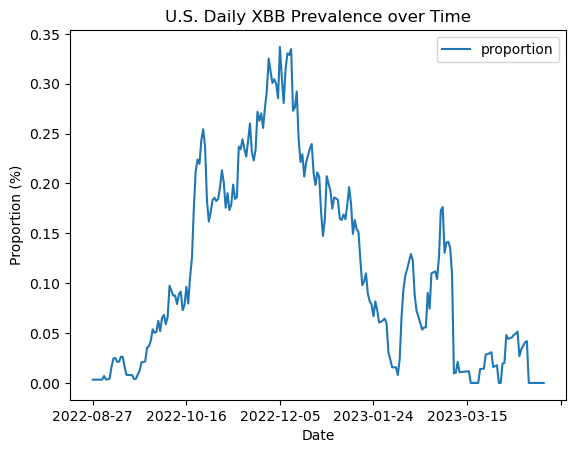

In [378]:
USA_xbb.plot.line(x='date', y='proportion', title='U.S. Daily XBB Prevalence over Time', xlabel='Date', ylabel='Proportion (%)')

### Finding the Daily Prevalence of XBB in Multiple Countries 

In [238]:
USA_xbb = od.daily_prev("xbb", "USA")
#MEX_xbb = od.daily_prev('xbb', 'MEX')
RUS_xbb = od.daily_prev('xbb', 'RUS')
GBR_xbb = od.daily_prev('xbb', 'GBR')
BRA_xbb = od.daily_prev('xbb', 'BRA')

In [239]:
USA_xbb['location'] = 'USA'
RUS_xbb['location'] = 'Russia'
GBR_xbb['location'] = 'Great Britain'
BRA_xbb['location'] = 'Brazil'
#MEX_xbb['location'] = 'Mexico'

In [240]:
combined = pd.concat([USA_xbb, RUS_xbb, GBR_xbb, BRA_xbb])

In [241]:
combined['proportion'] = combined['proportion'].apply(lambda x: x*100)
combined = combined.rename(columns={"proportion": "proportion (%)"})

In [236]:
RUS_xbb[RUS_xbb['proportion']==RUS_xbb['proportion'].max()]

,date,total_count,lineage_count,total_count_rolling,lineage_count_rolling,proportion,proportion_ci_lower,proportion_ci_upper,location
71,2022-12-27,10,1,7.428571,0.571429,0.076923,0.015877,0.500797,Russia


In [431]:
alt.Chart(combined, title = "Daily Prevalence of Lineage XBB").mark_line().encode(
    x='date:T',
    y=alt.Y('proportion (%):Q'),
    color = 'location:N')

alt.Chart(...)

In [442]:
xbb_1 = od.daily_prev("xbb", "RUS")
xbb_2 = od.daily_prev('xbb.1', 'RUS')
xbb_1['lineage'] = 'xbb'
xbb_2['lineage'] = 'xbb.1'
combined = pd.concat([xbb_1, xbb_2])
combined = combined.sort_values(by="date")
combined = combined.loc[combined["date"].between("2022-09-12", "2023-04-30")]
combined['proportion'] = combined['proportion'].apply(lambda x: x*100)
combined = combined.rename(columns={"proportion": "proportion (%)"})
alt.Chart(combined, title = "Daily Prevalence of XBB and XBB.1 in Russia").mark_line().encode(
    x='date:T',
    y=alt.Y('proportion (%):Q'),
    color = 'lineage:N')

alt.Chart(...)

### Daily Prevalence of Specific Mutations

In [303]:
xbb_mutations = od.daily_prev("xbb", "USA", mutations = 'orf1a:k47r, s:t19i')
xbb_mutations['mutations']= 'ORF1a:K47R AND S:T19I'

xbb_mutations=xbb_mutations.sort_values(by="date")
xbb_mutations['proportion'] = xbb_mutations['proportion'].apply(lambda x: x*100)
xbb_mutations = xbb_mutations.rename(columns={"proportion": "proportion (%)"})


alt.Chart(xbb_mutations, title = "Daily ORF1a:K47R AND S:T19I Prevalence of Lineage XBB").mark_line().encode(
    x='date:T',
    y=alt.Y('proportion (%):Q'),
    color = 'mutations:N')


alt.Chart(...)

In [148]:
lin_increase_ca = od.prevalence_by_location('USA_US-CA',  startswith = 'xbb')
lin_increase_ca
#lin_increase_la = od.prevalence_by_location('USA_US-LA', startswith = 'xbb')
num_dats_ca = lin_increase_ca.groupby('lineage').apply(len)
#num_dats_la = lin_increase_la.groupby('lineage').apply(len)
num_dats_ca
counts = pd.DataFrame({'ca_counts': num_dats_ca, 'la_counts': num_dats_la})
lin_increase_ca['location'] = 'California'
lin_increase_la['location'] = 'Louisiana'
lin_increase_all = pd.concat([lin_increase_ca, lin_increase_la])

,date,total_count,lineage_count,lineage,prevalence,prevalence_rolling
2113,2022-09-26,886,1,xbb.1,0.001129,0.001662
2114,2022-09-27,0,0,xbb.1,0.000000,0.000848
2115,2022-09-28,617,1,xbb.1,0.001621,0.001121
2116,2022-09-29,0,0,xbb.1,0.000000,0.000834
2117,2022-09-30,515,1,xbb.1,0.001942,0.001014
...,...,...,...,...,...,...
2827,2023-04-21,20,8,xbb.1.5,0.400000,0.400000
2828,2023-04-22,6,1,xbb.1.5,0.166667,0.431193
2829,2023-04-23,4,1,xbb.1.5,0.250000,0.427184
2830,2023-04-24,3,1,xbb.1.5,0.333333,0.400000


### Cases_by_Location Graphs

***One Location

In [391]:
counts_ca = od.cases_by_location('USA_US-CA')
counts_ca= counts_ca.rename(columns={"admin1": "location"})
counts_ca = counts_ca.sort_values(by = "date")
counts_ca = counts_ca.loc[counts_ca["date"].between("2021-05-15", "2021-08-15")]
print(counts_ca)


                               _id    _score    location  \
621  USA_California_None2021-05-15  8.418888  California   
622  USA_California_None2021-05-16  8.418888  California   
623  USA_California_None2021-05-17  8.418888  California   
624  USA_California_None2021-05-18  8.418888  California   
625  USA_California_None2021-05-19  8.418888  California   
..                             ...       ...         ...   
166  USA_California_None2021-08-11  8.419768  California   
644  USA_California_None2021-08-12  8.418888  California   
413  USA_California_None2021-08-13  8.418888  California   
167  USA_California_None2021-08-14  8.419768  California   
414  USA_California_None2021-08-15  8.418888  California   

     confirmed_numIncrease        date  
621                   1504  2021-05-15  
622                   1087  2021-05-16  
623                    793  2021-05-17  
624                   1054  2021-05-18  
625                   1400  2021-05-19  
..                     ...       

In [344]:
alt.Chart(counts_ca, title = "Confirmed SARS-COV-2 Case Count Increase Over 3 Month Span").mark_line().encode(
    x='date:T',
    y=alt.Y('confirmed_numIncrease:Q'),
    color = 'location:N')

alt.Chart(...)

***Or Multiple locations:

In [362]:
counts_ca = od.cases_by_location('USA_US-NY')
counts_ny = od.cases_by_location('USA_US-TX')
counts_fl = od.cases_by_location('USA_US-LA')
counts_wa = od.cases_by_location('USA_US-FL')

state_count = pd.concat([counts_ca, counts_ny, counts_fl, counts_wa])
state_count = state_count.rename(columns={"admin1": "location"})

state_count = state_count.sort_values(by = "date")

state_count = state_count.loc[state_count["date"].between("2020-10-15", "2021-01-15")]

In [366]:
alt.Chart(state_count, title = " 90 Day SARS-COV-2 Case Count Increase in Four States").mark_line().encode(
    x='date:T',
    y=alt.Y('confirmed_numIncrease:Q'),
    color = 'location:N')

alt.Chart(...)

In [1]:
f = od.prevalence_by_location("ARG", startswith = 'xbb.1')
print(f)

NameError: name 'od' is not defined